# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data (subtract the mean of each feature)
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Step 2: Perform SVD on the centered training data
    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

    # Step 3: Select the top n_components from the Vt matrix
    Vt_reduced = Vt[:n_components, :]  # Shape (n_components, 784)

    # Step 4: Project the training and test data onto the reduced component space
    X_train_svd = np.dot(X_train_centered, Vt_reduced.T)  # Shape (n_train, n_components)
    X_test_svd = np.dot(X_test_centered, Vt_reduced.T)    # Shape (n_test, n_components)

    return X_train_svd, X_test_svd

## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    # Convert y_train and y_test to integer type
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Create logistic regression model
    model = LogisticRegression(max_iter=2000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [150, 100, 80, 50, 20]  # You need to decide what number to search...

# Store the results
n_components_list = []
accuracy_list = []
training_time_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...

    #print(f"{n_components} components test set")
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    #print(f"{n_components} components test set complete")
    
    # Train the logistic regression model and get accuracy and training time
    #print(f"{n_components} components train logistic model")
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    #print(f"{n_components} components store results")
    n_components_list.append(n_components)
    accuracy_list.append(accuracy)
    training_time_list.append(training_time)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 150 components...
SVD components: 150, Accuracy: 0.9197, Training time: 28.3486 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 17.4786 seconds
Applying custom SVD with 80 components...
SVD components: 80, Accuracy: 0.9164, Training time: 11.6767 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 4.9835 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8784, Training time: 0.8972 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


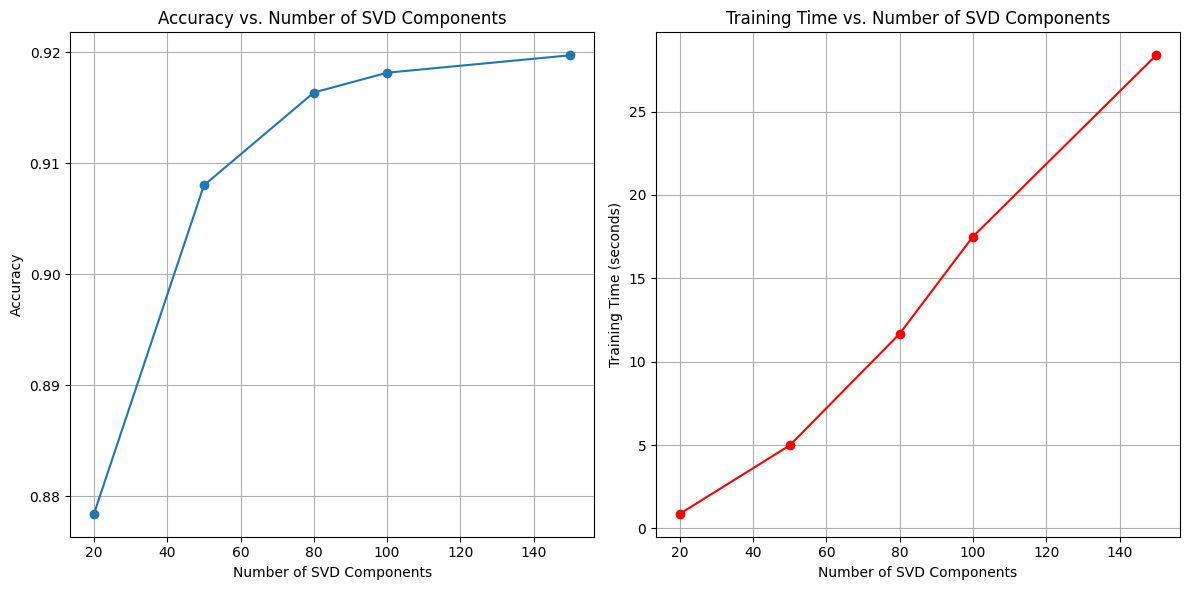

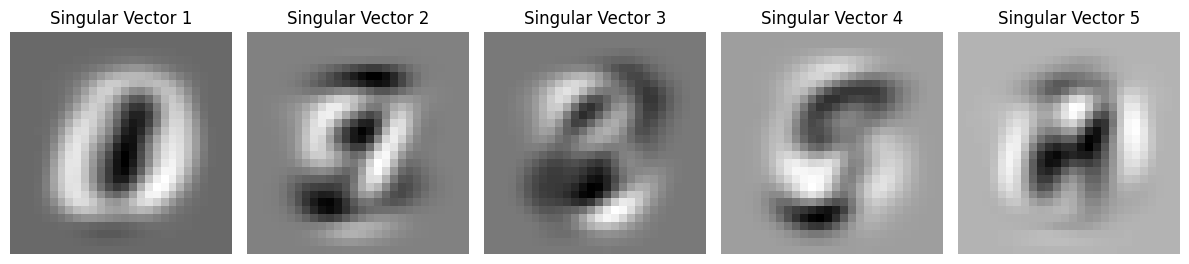

In [11]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Plot Accuracy and Training Time vs. Number of SVD Components

# Create a figure with two subplots: one for accuracy, one for training time
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_time_list, marker='o', color='r')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


def visualize_singular_vectors(X_train, n_components=5):
    # Center the data (subtract the mean of each feature)
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)
    
    # Get the top n_components singular vectors
    top_singular_vectors = Vt[:n_components]
    
    # Plot each singular vector as a 28x28 image
    plt.figure(figsize=(12, 6))
    for i, singular_vector in enumerate(top_singular_vectors):
        plt.subplot(1, n_components, i + 1)
        plt.imshow(singular_vector.reshape(28, 28), cmap='gray')
        plt.title(f"Singular Vector {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors
visualize_singular_vectors(X_train)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

Based on the charts, between 60 and 80 components appears to be the sweet spot before too much time is taken training the data and we gain meaningful improvements in accuracy. This is reflected in the singular vectors, where even the middle vectors show the largest improvements from the first vector.